## Avaliação histórica (1994-2021) do desempenho monetário-fiscal (relativo) de 18 das maiores potências econômicas contemporâneas

Para visualização dinâmica do matplotlib, basta clonar projeto e executar o arquivo main.py

Linux:
```
git clone 
python main.py
```

Débito (% do PIB) e poder de compra da moeda nacional são duas principais variáveis que impactam diretamente no nível de investimento direto (não especulação), acesso da população à produtos, tecnologias e consequentemente o nível de desenvolvimento de um país (principalmente aqueles mais dependentes de importações de produtos e insumos). Elas ditam a dinâmica macroeconômica e devem sempre ser analisadas de forma relativa, em relação aos outros países.

In [1]:
!pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from adjustText import adjust_text
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")
plt.rcParams.update({"font.size": 20})

In [3]:
drive.mount("/content/drive/", force_remount=True)
folder_path = "/content/drive/MyDrive/Colab Notebooks/Data"

Mounted at /content/drive/


In [4]:
g18 = ["USA", "CHN", "JPN", "DEU", "GBR", "IND", "FRA", "ITA", "CAN", "KOR", "RUS", "AUS", "BRA", "ESP", "MEX", "IND", "SAU", "CHE"]

In [5]:
code_country = pd.read_excel(f"{folder_path}/country_codes_ISO_3166-1_alpha-3.xlsx", names=["code", "country"], usecols=[0, 1]).set_index("code").to_dict()["country"]
code_country = {k: v.lower() for k,v in code_country.items()}
code_country["DEU"] = "germany"
code_country["EURO"] = code_country["EA19"] = "euro zone"
country_code = {v: k for k, v in code_country.items()}


## Taxas de câmbio por país (1994-2022).

Fonte: https://data.oecd.org/conversion/exchange-rates.htm


In [6]:
exchange_rates_temp = pd.read_csv(f"{folder_path}/exchange_rates.csv", header=0, usecols=["LOCATION", "TIME", "Value"])
exchange_rates_temp = exchange_rates_temp.rename(columns={
    "LOCATION": "code",
    "TIME": "year",
    "Value": "exchange_rate"
})

exchange_rates_temp.code = exchange_rates_temp.code.replace("EU27_2020", "EURO")

In [7]:
years = list(set(exchange_rates_temp["year"]))
codes = list(set(exchange_rates_temp["code"]))

exchange_rates = pd.DataFrame([], columns=years, index=codes)

for code in codes:

    for year in years:

        mask = (exchange_rates_temp["year"].eq(year) & exchange_rates_temp["code"].eq(code))
        rate = exchange_rates_temp[mask]["exchange_rate"].values

        # converting all to US$
        if code == "USA":
            exchange_rates.at[code, year] = rate[0] if len(rate) else np.nan
        else:
            exchange_rates.at[code, year] = 1 / rate[0] if len(rate) else np.nan

for code in exchange_rates.index:
    exchange_rates.at[code, "country"] = code_country[code]

exchange_rates = exchange_rates[list(range(1994, 2022))]
exchange_rates = exchange_rates[exchange_rates.index.isin(g18)]
    
display(exchange_rates)

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
IND,0.031874,0.030838,0.028222,0.027538,0.024237,0.023226,0.022251,0.021193,0.020572,0.021467,...,0.018714,0.017065,0.016386,0.015588,0.014882,0.015356,0.014622,0.0142,0.013495,0.013529
MEX,0.296286,0.155777,0.131589,0.126287,0.109457,0.104598,0.105758,0.10704,0.103563,0.092687,...,0.075933,0.078296,0.075231,0.063098,0.053579,0.052836,0.051963,0.051911,0.046543,0.049328
AUS,0.731127,0.741272,0.782557,0.742181,0.628209,0.645182,0.579768,0.517212,0.543312,0.648545,...,1.03541,0.965397,0.901418,0.751264,0.743376,0.766426,0.747154,0.695165,0.688191,0.751188
FRA,1.181469,1.314152,1.282288,1.123851,1.111883,1.065777,0.923613,0.89563,0.945574,1.13116,...,1.284789,1.328118,1.328501,1.109513,1.106904,1.129681,1.180954,1.119475,1.142197,1.182741
KOR,0.001244,0.001297,0.001243,0.001053,0.000713,0.000841,0.000885,0.000775,0.000799,0.000839,...,0.000887,0.000913,0.00095,0.000884,0.000861,0.000884,0.000909,0.000858,0.000847,0.000874
ESP,1.242076,1.334408,1.313627,1.13641,1.11373,1.065777,0.923613,0.89563,0.945574,1.13116,...,1.284789,1.328118,1.328501,1.109513,1.106904,1.129681,1.180954,1.119475,1.142197,1.182741
CHN,0.116026,0.11974,0.120277,0.12063,0.120788,0.120798,0.120795,0.120816,0.120817,0.120816,...,0.15842,0.161401,0.162775,0.160578,0.150501,0.147956,0.15115,0.144752,0.144911,0.155063
CAN,0.73224,0.728627,0.733395,0.722231,0.674079,0.673081,0.673222,0.645644,0.636804,0.713768,...,1.000635,0.970745,0.905185,0.781992,0.754367,0.770454,0.771713,0.753697,0.745627,0.797526
DEU,1.205224,1.364724,1.29975,1.127893,1.111477,1.065777,0.923613,0.89563,0.945574,1.13116,...,1.284789,1.328118,1.328501,1.109513,1.106904,1.129681,1.180954,1.119475,1.142197,1.182741
USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Dívida do Governo Central (% do PIB) por país (1994-2021).

Fontes:

https://www.imf.org/external/datamapper/CG_DEBT_GDP@GDD/SWE

https://fred.stlouisfed.org/series/GGGDTACNA188N

https://countryeconomy.com/national-debt/china

https://tradingeconomics.com/china/government-debt-to-gdp

https://countryeconomy.com/national-debt/russia

In [8]:
gov_debt = pd.read_excel(f"{folder_path}/central_government_debt.xlsx", header=0)
gov_debt = gov_debt.rename(columns={
    "Central Government Debt (Percent of GDP)": "country"
})

gov_debt.country = gov_debt.country.str.lower()

for country in gov_debt.country:
    gov_debt.at[gov_debt["country"].eq(country), "code"] = country_code[country.lower().strip()]

gov_debt = gov_debt.set_index("code")
gov_debt = gov_debt[gov_debt.index.isin(g18)]
gov_debt = gov_debt[list(range(1994, 2022))]
gov_debt.columns = list(map(int, gov_debt.columns))

display(gov_debt)

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
code,,,,,,,,,,,,,,,,,,,,,
AUS,19.906279,22.137038,21.396560,20.524959,16.293880,15.448118,13.703233,11.988502,10.314738,8.974949,...,19.236659,21.245224,24.595581,28.451785,31.616571,32.369447,32.920325,36.543507,43.726013,43.953679
BRA,39.499850,33.390598,40.228735,42.482921,54.424387,64.583266,62.645676,66.265559,74.976546,70.573579,...,59.849478,57.228409,58.457281,67.537565,73.418804,78.608901,80.359359,82.683081,92.670741,87.748233
CAN,63.084680,64.186571,64.515825,61.482083,58.709497,52.917027,46.190434,46.009193,42.916778,40.477244,...,45.349910,41.578039,39.851060,42.458430,41.639320,39.255298,36.155300,35.723236,59.445550,55.548349
FRA,38.792508,44.119832,47.585737,48.825126,49.929876,49.685974,48.580230,48.465739,50.616282,53.757177,...,72.026863,74.745334,76.026915,76.609147,78.930089,79.551915,80.442397,80.869367,92.981652,91.763165
DEU,28.815774,35.465927,37.275500,37.747444,38.261435,39.062385,38.226913,36.416913,37.009126,38.883508,...,50.645537,49.539723,47.771322,45.335472,43.562752,41.318607,39.308413,37.420924,44.426607,46.267287
IND,48.871916,46.612450,44.877201,NaN,54.880335,52.234777,55.595253,57.009132,59.823580,57.215179,...,47.092134,46.981927,46.025387,45.773840,45.532489,44.272661,44.127895,46.771273,55.180911,54.266604
ITA,119.248470,117.702053,117.621095,115.051952,112.271400,110.655355,105.946631,105.601140,103.152047,101.217910,...,120.031114,126.338775,129.811461,130.034700,129.895529,129.560841,130.078046,129.941769,150.848826,146.546266
JPN,56.772668,62.206591,65.877228,69.476583,77.223967,88.121135,94.177705,100.988613,110.001093,117.500514,...,185.025240,189.143948,192.851599,189.862003,194.594781,193.931127,195.731694,199.789703,221.426932,221.323518
KOR,9.243627,8.152614,7.502808,9.308807,13.297701,15.168509,15.490529,15.996689,16.132705,18.964249,...,29.518552,30.916449,32.183164,33.564123,34.002007,34.177731,34.337929,36.321158,42.211003,45.330841


## Min-Max Scaling

In [9]:
exchange_rates_scaled = exchange_rates.copy()

for col in range(1994, 2021):
  
    X = exchange_rates_scaled[col].values.astype(float)
    X_not_null = X[~np.isnan(X)]
    X_min, X_max = min(X_not_null), max(X_not_null)
    exchange_rates_scaled[col] = (X - X_min) / (X_max - X_min) # 0 - 1 (relativo à US$ base 2021)

exchange_rates_scaled

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
IND,0.020031,0.018735,0.017306,0.016189,0.014211,0.013842,0.014130,0.014191,0.013200,0.012640,...,0.011291,0.010338,0.009386,0.009630,0.010391,0.011252,0.010285,0.010460,0.009872,0.013529
MEX,0.192945,0.097970,0.083613,0.076547,0.065690,0.064161,0.069355,0.073857,0.068603,0.056283,...,0.047534,0.049528,0.045169,0.040746,0.039069,0.040393,0.038293,0.040024,0.035666,0.049328
AUS,0.477313,0.469284,0.501188,0.452999,0.379060,0.398447,0.382826,0.358939,0.362170,0.396905,...,0.655270,0.617303,0.547558,0.491442,0.550283,0.595217,0.559716,0.544317,0.536483,0.751188
FRA,0.771818,0.832599,0.821751,0.686287,0.671240,0.658533,0.610216,0.621950,0.630712,0.692646,...,0.813227,0.849458,0.807259,0.726068,0.819695,0.877652,0.885085,0.876964,0.890841,1.182741
KOR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000874
ESP,0.811452,0.845445,0.841854,0.693963,0.672356,0.658533,0.610216,0.621950,0.630712,0.692646,...,0.813227,0.849458,0.807259,0.726068,0.819695,0.877652,0.885085,0.876964,0.890841,1.182741
CHN,0.075063,0.075116,0.076356,0.073089,0.072536,0.074179,0.079299,0.083432,0.080122,0.073520,...,0.099782,0.102718,0.098403,0.104588,0.110899,0.114350,0.112687,0.112809,0.112444,0.155063
CAN,0.478041,0.461265,0.469653,0.440805,0.406770,0.415699,0.444629,0.448203,0.424583,0.436874,...,0.633243,0.620726,0.549848,0.511566,0.558428,0.598349,0.578136,0.590205,0.581312,0.797526
DEU,0.787353,0.864671,0.832952,0.688757,0.670995,0.658533,0.610216,0.621950,0.630712,0.692646,...,0.813227,0.849458,0.807259,0.726068,0.819695,0.877652,0.885085,0.876964,0.890841,1.182741
USA,0.653145,0.633367,0.640672,0.610586,0.603653,0.617858,0.660733,0.694491,0.667046,0.612273,...,0.632841,0.639450,0.607503,0.654345,0.740468,0.776824,0.749361,0.783299,0.779855,1.0


In [10]:
gov_debt_scaled = gov_debt.copy()

for col in range(1994, 2022):

    X = gov_debt_scaled[col].values.astype(float)
    X_not_null = X[~np.isnan(X)]
    X_min, X_max = min(X_not_null), max(X_not_null)
    gov_debt_scaled[col] = (X - X_min) / (X_max - X_min) # 0 - 1 (relativo à US$ base 2021)

gov_debt_scaled

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
code,,,,,,,,,,,,,,,,,,,,,
AUS,0.121709,0.127654,0.126171,0.106070,0.030272,0.002928,0.000000,0.000000,0.000000,0.000000,...,0.089018,0.102127,0.120413,0.123067,0.102059,0.104607,0.109896,0.129446,0.143749,0.145200
BRA,0.294937,0.230380,0.297189,0.313724,0.415531,0.517503,0.530579,0.579805,0.648653,0.567596,...,0.312179,0.294555,0.297431,0.335418,0.332372,0.360871,0.369250,0.375497,0.379589,0.356260
CAN,0.503452,0.511495,0.517743,0.493396,0.458827,0.395327,0.352190,0.363420,0.327046,0.290275,...,0.232506,0.210861,0.200163,0.199164,0.157280,0.142769,0.127582,0.125071,0.219493,0.201079
FRA,0.288683,0.328320,0.363999,0.373701,0.370120,0.361489,0.378097,0.389661,0.404283,0.412642,...,0.379092,0.388230,0.389279,0.384703,0.362737,0.366097,0.369704,0.365825,0.381087,0.375609
DEU,0.200478,0.249324,0.270370,0.268941,0.252226,0.250232,0.265858,0.260952,0.267784,0.275590,...,0.261605,0.253438,0.241568,0.214795,0.167878,0.154204,0.144821,0.134125,0.147124,0.156350
IND,0.377796,0.351073,0.339402,NaN,0.420138,0.388182,0.454147,0.480925,0.496646,0.444506,...,0.242080,0.239760,0.232441,0.217177,0.178730,0.170576,0.171169,0.183988,0.198944,0.194902
ITA,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.931294,0.849965,...,0.642868,0.664136,0.670447,0.674961,0.643535,0.643253,0.641066,0.627517,0.659920,0.639625
JPN,0.447647,0.493421,0.530107,0.568999,0.645891,0.764007,0.872414,0.950728,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
KOR,0.027439,0.000000,0.000000,0.000000,0.000000,0.000000,0.019376,0.042817,0.058363,0.092046,...,0.145516,0.153846,0.160078,0.150842,0.115202,0.114629,0.117646,0.128260,0.136449,0.151837


## Interpolação (NaN na dívida da Índia)

In [11]:
gov_debt_scaled.at["IND", 1997] = (gov_debt_scaled.loc["IND", 1996] + gov_debt_scaled.loc["IND", 1998]) / 2
print(f"NaN? {any(gov_debt_scaled.isnull().sum().values)}")

NaN? False


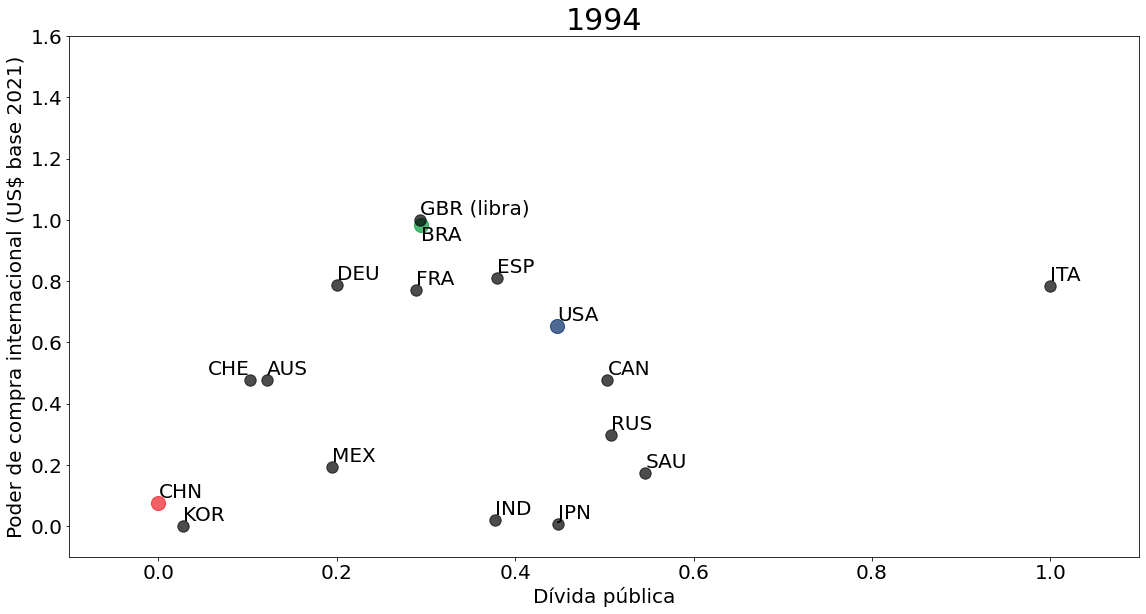

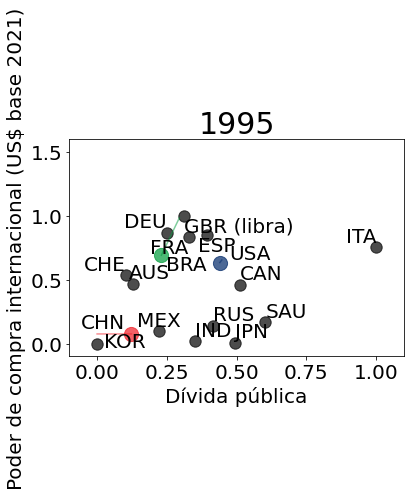

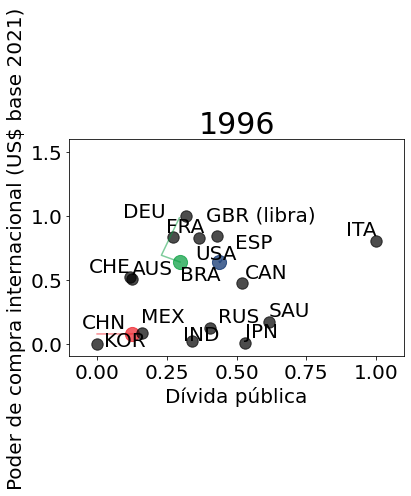

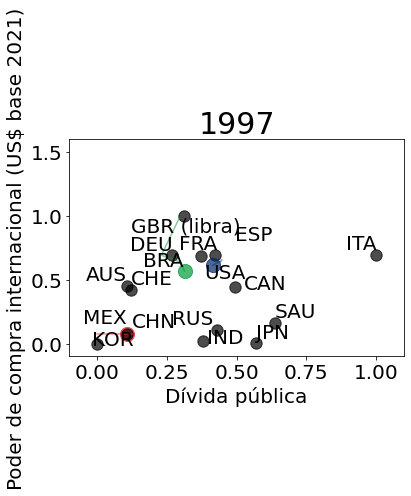

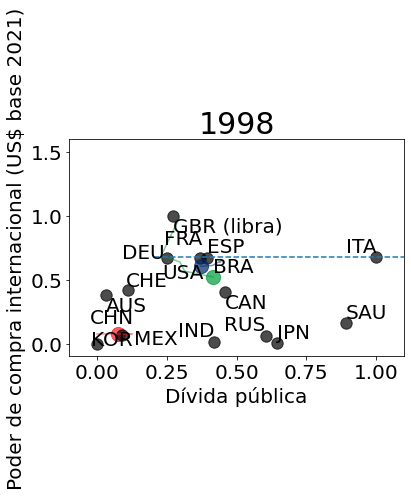

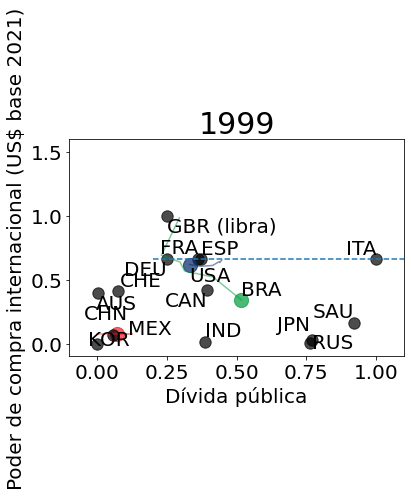

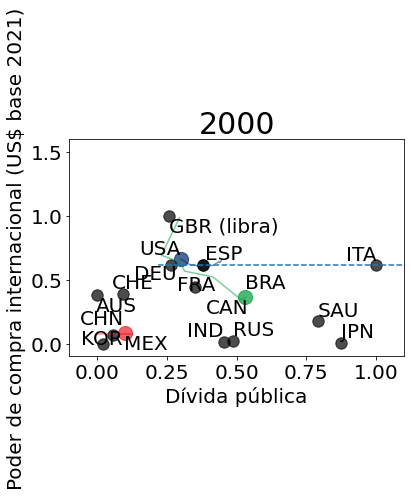

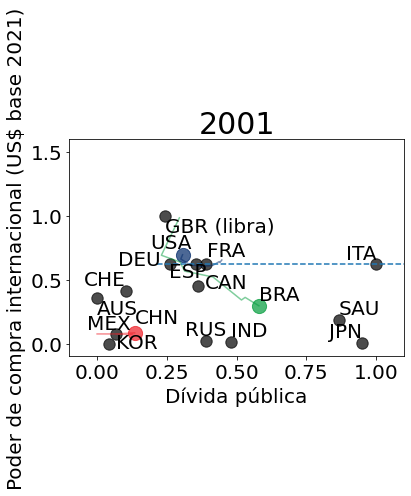

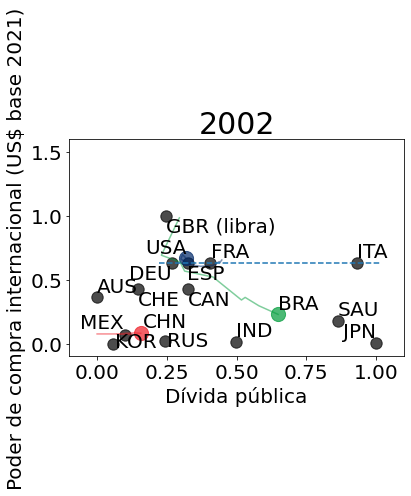

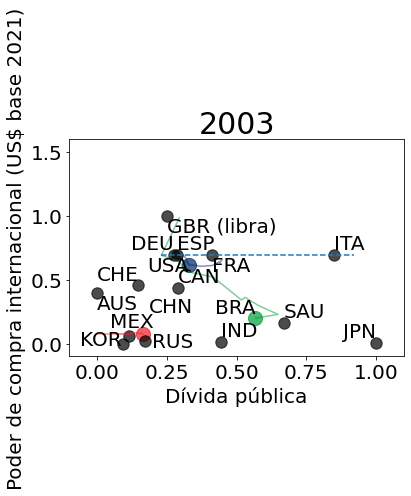

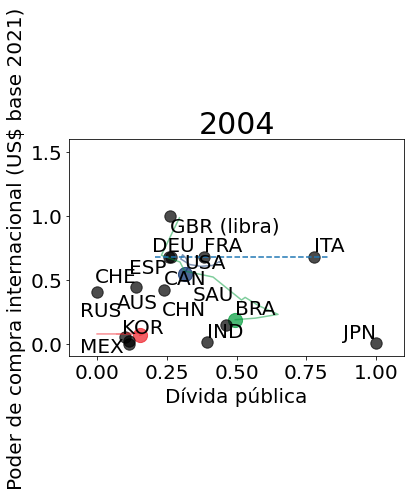

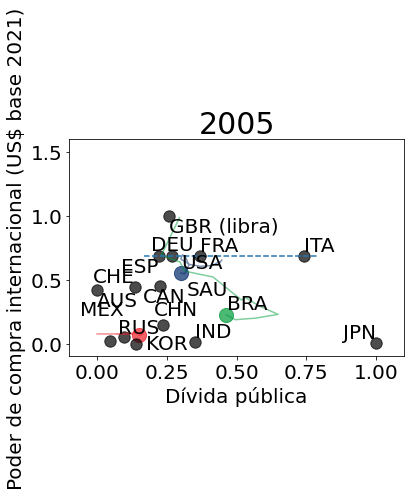

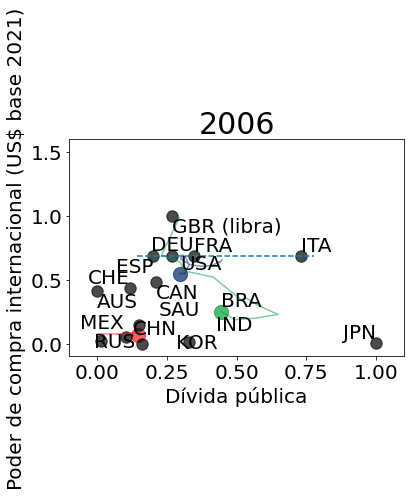

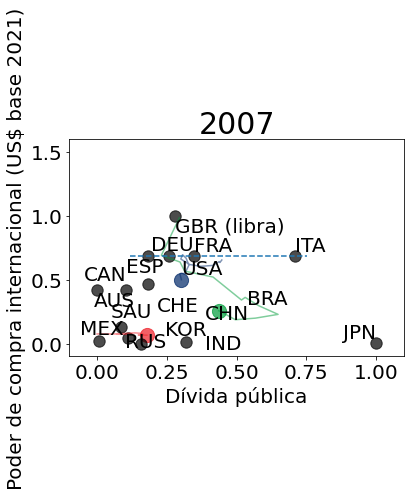

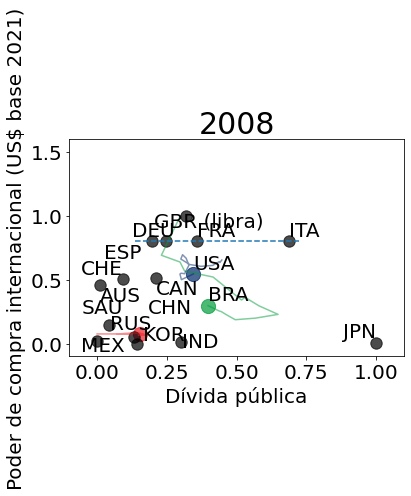

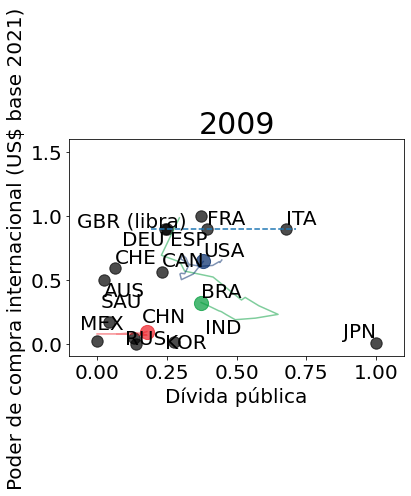

In [ ]:
# initialize plot
plt.ion()
fig = plt.figure(figsize=(19.18, 9.58))
plt.grid(color="gray", linestyle=":", linewidth=0.5)

# initialize paths tracker
paths = {}

# filter desired countries
g18 = [code for code in list(code_country.keys()) if code in exchange_rates_scaled.index]

for year in range(1994, 2022):

    annotations, texts, euro_zone = [], [], []
    euro_rate = None
    euro_zone_xmin = 1
    euro_zone_xmax = 0

    for i, code in enumerate(g18):

        # get country exchange rate and debt
        rate = exchange_rates_scaled.loc[code, year]
        debt = gov_debt_scaled.loc[code, year]

        if code not in paths:
            paths[code] = {"x": [], "y": [], "color": "black"}

        euro_zone = any([
            code == "DEU" and year >= 1998, # Alemanha, França, Espanha e Itália: adoção ao bloco econômico: 1 de janeiro de 1999 (fechamento do ano 1998)
            code == "FRA" and year >= 1998,
            code == "ESP" and year >= 1998,
            code == "ITA" and year >= 1998
        ])

        if euro_zone:
            euro_zone_xmin = min(debt, euro_zone_xmin)
            euro_zone_xmax = max(debt, euro_zone_xmax)
            euro_rate = rate

        if code == "GBR": code = "GBR (libra)"

        if code == "BRA": color = "#009c3b"; size = 200
        elif code == "USA": color = "#002868"; size = 200
        elif code == "CHN": color = "#EE1C25"; size = 200
        else: color = "black"; size = 130

        annotations += [(debt, rate, code, color, size)]

        # updating paths tracker
        if code in ["BRA", "USA", "CHN"]:
            
            paths[code]["x"].append(debt)
            paths[code]["y"].append(rate)
            paths[code]["color"] = color

    # clean the current figure and refresh
    plt.clf()

    plt.title(year, fontsize=30)

    for debt, rate, code, color, size in annotations:
      
        plt.scatter(x=debt, y=rate, c=color, marker="o", s=size, alpha=0.7)
        texts += [plt.text(debt, rate, code)]

        # tracking evolution
        if code in paths.keys():
            plt.plot(paths[code]["x"], paths[code]["y"], color=color, alpha=0.5, markersize=10)

    adjust_text(texts, only_move={"points": "y", "texts": "y"})

    plt.ylabel("Poder de compra internacional (US$ base 2021)")
    plt.ylim(-0.1, 1.6)

    plt.xlabel("Dívida pública")
    plt.xlim(-0.1, 1.1)

    if year >= 1998:
        plt.axhline(euro_rate, xmin=euro_zone_xmin, xmax=euro_zone_xmax, linestyle="--")

    if not i:
        plt.show()
    else:
        fig.canvas.draw()
    
    plt.pause(0.4) # don't rush
